In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import kruskal
import seaborn as sns

In [3]:
pr = pd.read_csv("../data sets/propublica-recidivism.csv")

In [4]:
pr

id                 name      first         last  \
0         1     miguel hernandez     miguel    hernandez   
1         3          kevon dixon      kevon        dixon   
2         4             ed philo         ed        philo   
3         5          marcu brown      marcu        brown   
4         6   bouthy pierrelouis     bouthy  pierrelouis   
...     ...                  ...        ...          ...   
7209  10996        steven butler     steven       butler   
7210  10997      malcolm simmons    malcolm      simmons   
7211  10999      winston gregory    winston      gregory   
7212  11000          farrah jean     farrah         jean   
7213  11001  florencia sanmartin  florencia    sanmartin   

     compas_screening_date     sex         dob  age          age_cat  \
0               2013-08-14    Male  1947-04-18   69  Greater than 45   
1               2013-01-27    Male  1982-01-22   34          25 - 45   
2               2013-04-14    Male  1991-05-14   24     Less than 25   
3               2013-01-13    Male  1993-01-21   23     Less than 25   
4               2013-03-26    Male  1973-01-22   43          25 - 45   
...                    ...     ...         ...  ...              ...   
7209            2013-11-23    Male  1992-07-17   23     Less than 25   
7210            2014-02-01    Male  1993-03-25   23     Less than 25   
7211            2014-01-14    Male  1958-10-01   57  Greater than 45   
7212            2014-03-09  Female  1982-11-17   33          25 - 45   
7213            2014-06-30  Female  1992-12-18   23     Less than 25   

                  race  ...  v_decile_score  v_score_text  v_screening_date  \
0                Other  ...               1           Low        2013-08-14   
1     African-American  ...               1           Low        2013-01-27   
2     African-American  ...               3           Low        2013-04-14   
3     African-American  ...               6        Medium        2013-01-13   
4                Other  ...               1           Low        2013-03-26   
...                ...  ...             ...           ...               ...   
7209  African-American  ...               5        Medium        2013-11-23   
7210  African-American  ...               5        Medium        2014-02-01   
7211             Other  ...               1           Low        2014-01-14   
7212  African-American  ...               2           Low        2014-03-09   
7213          Hispanic  ...               4           Low        2014-06-30   

      in_custody  out_custody  priors_count.1 start   end event two_year_recid  
0     2014-07-07   2014-07-14               0     0   327     0              0  
1     2013-01-26   2013-02-05               0     9   159     1              1  
2     2013-06-16   2013-06-16               4     0    63     0              1  
3            NaN          NaN               1     0  1174     0              0  
4            NaN          NaN               2     0  1102     0              0  
...          ...          ...             ...   ...   ...   ...            ...  
7209  2013-11-22   2013-11-24               0     1   860     0              0  
7210  2014-01-31   2014-02-02               0     1   790     0              0  
7211  2014-01-13   2014-01-14               0     0   808     0              0  
7212  2014-03-08   2014-03-09               3     0   754     0              0  
7213  2015-03-15   2015-03-15               2     0   258     0              1  

[7214 rows x 53 columns]

#### Analyze gender distribution

In [5]:
barWidth = .25

bars1 = [np.sum(pr['sex'] == 'Female'), np.sum(pr['sex'] == 'Male')]
bars2 = [np.sum((pr['sex'] == 'Female') & (pr['two_year_recid'] == 1)), 
         np.sum((pr['sex'] == 'Male') & (pr['two_year_recid'] == 1))]
x_labels = ('Females', 'Males')
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

plt.rcParams["figure.figsize"] = (7,4.5)
plt.bar(r1, bars1, color='tab:blue', width=barWidth, edgecolor='white', label='total')
plt.bar(r2, bars2, color='tab:green', width=barWidth, edgecolor='white', label='rearested')
plt.legend()
plt.xticks([r + barWidth for r in range(len(bars1))], x_labels)

plt.show()

#### Analyze race distribution

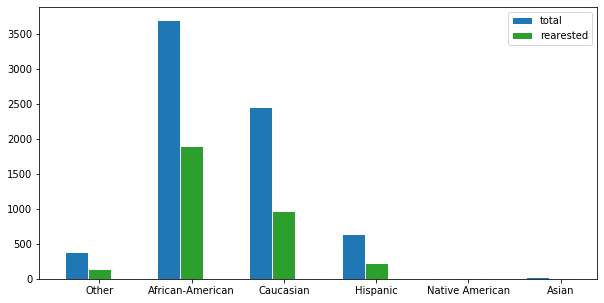

In [6]:
races = pd.unique(pr['race'])

sum_race = []
sum_race_rearested = []
for race in pd.unique(pr['race']):
    sum_race.append(np.sum(pr['race'] == race))
    sum_race_rearested.append(np.sum((pr['race'] == race) & (pr['two_year_recid'] == 1)))
    
    

barWidth = .25

bars1 = [x for x in sum_race]
bars2 = [x for x in sum_race_rearested]
x_labels = (pd.unique(pr['race']))
y_pos1 = np.arange(len(bars1))
y_pos2 = [x + barWidth for x in y_pos1]


plt.rcParams["figure.figsize"] = (10,5)
plt.bar(y_pos1, bars1, color='tab:blue', width=barWidth ,edgecolor='white', label='total')
plt.bar(y_pos2, bars2, color='tab:green', width=barWidth, edgecolor='white', label='rearested')
plt.legend()
plt.xticks([r + barWidth for r in range(len(bars1))], x_labels)

plt.show()

#### Create combined attribute "race-sex"

In [7]:
import itertools

races = pd.unique(pr['race']) 
genders = pd.unique(pr['sex'])
combined = list(itertools.product(races, genders))
combined_list = []
for c in combined:
    print(str(c) + ': ' + str(np.sum((pr['race'] == c[0]) & (pr['sex'] == c[1]))))
    combined_list.append([c, np.sum((pr['race'] == c[0]) & (pr['sex'] == c[1]))])

('Other', 'Male'): 310
('Other', 'Female'): 67
('African-American', 'Male'): 3044
('African-American', 'Female'): 652
('Caucasian', 'Male'): 1887
('Caucasian', 'Female'): 567
('Hispanic', 'Male'): 534
('Hispanic', 'Female'): 103
('Native American', 'Male'): 14
('Native American', 'Female'): 4
('Asian', 'Male'): 30
('Asian', 'Female'): 2


#### Analyze gender distribution in for each race

In [8]:
barWidth = 0.25

bars1 = [x[1] for x in combined_list[0::2]]
bars2 = [x[1] for x in combined_list[1::2]]

x_labels = pd.unique(pr['race']) 

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

plt.bar(r1, bars1, color='tab:blue', width=barWidth, edgecolor='white', label='males')
plt.bar(r2, bars2, color='tab:green', width=barWidth, edgecolor='white', label='females')

plt.xticks([r + barWidth for r in range(len(bars1))], x_labels)
plt.legend()
plt.show()


In [9]:
rearrested_males = []
rearrested_females = []
for r in pd.unique(pr['race']) :
        rearrested_males.append(np.sum((pr['race'] == r) 
                                      & (pr['sex'] == 'Male') & (pr['two_year_recid'] == 1)))
        rearrested_females.append(np.sum((pr['race'] == r) 
                                      & (pr['sex'] == 'Female') & (pr['two_year_recid'] == 1)))

bars1 = [x[1] for x in combined_list[0::2]]
bars2 = rearrested_males
bars3 = [x[1] for x in combined_list[1::2]]
bars4 = rearrested_females


x_labels = pd.unique(pr['race']) 

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]


plt.bar(r1, bars1, color='tab:blue', width=barWidth, edgecolor='white', label='males')
plt.bar(r2, bars2, color='aquamarine', width=barWidth, edgecolor='white', label='rearrested_males')
plt.bar(r3, bars3, color='tab:red', width=barWidth, edgecolor='white', label='females')
plt.bar(r4, bars4, color='orange', width=barWidth, edgecolor='white', label='rearrested_females')


plt.xticks([r + barWidth for r in range(len(bars1))], x_labels)
plt.legend()
plt.show()